# Step 1: Importing Data
In this step, we import the dataset and load it into a Pandas DataFrame for analysis.

In [44]:
import pandas as pd
import numpy as np

In [4]:
products = pd.read_csv('/content/product_info.csv')
products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


## Step 2: Cleaning and Handling Missing Values
We perform the following:
- Drop irrelevant or high-null columns.
- Fill missing values in `rating` and `reviews`.
- Check the remaining nulls.
- Prepare the data for outlier detection.

In [7]:
#get info about data
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [8]:
products.isnull().sum().sort_values(ascending=False)

,0
sale_price_usd,8224
value_price_usd,8043
variation_desc,7244
child_max_price,5740
child_min_price,5740
highlights,2207
size,1631
variation_value,1598
variation_type,1444
tertiary_category,990


In [ ]:
#remove the unimportant
products.drop(columns=['variation_desc', 'value_price_usd'], inplace=True)

In [13]:
#Fill in missing values
products['rating'].fillna(products['rating'].mean(), inplace=True)
products['reviews'].fillna(0, inplace=True)

############################
products['variation_value'].fillna('Unknown', inplace=True)
products['size'].fillna('Unknown', inplace=True)
products['variation_type'].fillna('Unknown', inplace=True)
products['ingredients'].fillna('Unknown', inplace=True)
products['tertiary_category'].fillna('Unknown', inplace=True)
products['secondary_category'].fillna('Unknown', inplace=True)
products['highlights'].fillna('Unknown', inplace=True)

###################
products['sale_price_usd'].fillna(products['price_usd'], inplace=True)
products['child_max_price'].fillna(products['price_usd'], inplace=True)
products['child_min_price'].fillna(products['price_usd'], inplace=True)



/tmp/ipython-input-13-2079143875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['rating'].fillna(products['rating'].mean(), inplace=True)
/tmp/ipython-input-13-2079143875.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

## Step 3: Outliers Detection
We detect and handle outliers using the IQR method for `price_usd`, which helps ensure the accuracy of our analysis.

In [14]:
#from scratch
Q1 = products['price_usd'].quantile(0.25)
Q3 = products['price_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = products[(products['price_usd'] < lower_bound) | (products['price_usd'] > upper_bound)]


print("Number of outliers in price_usd:", len(outliers))

Number of outliers in price_usd: 845


In [17]:
#a copy without outliers
products = products[(products['price_usd'] >= lower_bound) & (products['price_usd'] <= upper_bound)].copy()

## Step 4: Exploratory Data Analysis (EDA)
Here, we explore the dataset:
- Summary statistics
- Category distributions
- Correlations and patterns
This step helps us understand trends and hidden insights.

In [18]:
#top brands?
top_brands = products.groupby("brand_name")["loves_count"].sum().sort_values(ascending=False).head(10)
print(top_brands)

brand_name
SEPHORA COLLECTION             12530142
Fenty Beauty by Rihanna         9331820
Anastasia Beverly Hills         7941142
Charlotte Tilbury               7705518
The Ordinary                    7449373
NARS                            7442525
Urban Decay                     5730058
Rare Beauty by Selena Gomez     5724687
Dior                            5692576
tarte                           4995414
Name: loves_count, dtype: int64


In [19]:
#What is the relationship between the number of reviews and rating? Is there a relationship?
correlation = products['rating'].corr(products['reviews'])
print(f"Correlation between rating and reviews: {correlation:.2f}")

Correlation between rating and reviews: 0.07


In [20]:
#Are new products rated higher?
new_vs_rating = products.groupby("new")["rating"].mean()
print(new_vs_rating)

new
0    4.174423
1    4.359668
Name: rating, dtype: float64


In [21]:
#Most expensive categories?
expensive_categories = products.groupby("secondary_category")["price_usd"].mean().sort_values(ascending=False).head(10)
print(expensive_categories)

secondary_category
Men                      90.259259
Women                    53.444444
Eye Care                 53.409458
Makeup Palettes          52.975000
Moisturizers             52.958184
Treatments               51.017395
Unknown                  50.875000
Value & Gift Sets        46.089095
High Tech Tools          45.295455
Candles & Home Scents    44.418972
Name: price_usd, dtype: float64


In [22]:
#Are out of stock products rated higher?
stock_vs_rating = products.groupby("out_of_stock")["rating"].mean()
print(stock_vs_rating)

out_of_stock
0    4.193793
1    4.107853
Name: rating, dtype: float64


In [24]:
#Which categories have the most "Sephora exclusive" products?
exclusive_by_category = products[products["sephora_exclusive"] == 1]["primary_category"].value_counts().head(10)
print(exclusive_by_category)


primary_category
Makeup             860
Skincare           690
Hair               337
Fragrance          187
Bath & Body        102
Mini Size           71
Tools & Brushes     25
Men                  2
Name: count, dtype: int64


In [26]:
#Do online products only get more love?
online_vs_loves = products.groupby("online_only")["loves_count"].mean()
print(online_vs_loves)


online_only
0    36535.288665
1     9266.629931
Name: loves_count, dtype: float64


In [27]:
#What are the most available product sizes?
size_counts = products["size"].value_counts().head(10)
print(size_counts)

size
Unknown           1435
1.7 oz/ 50 mL      379
1 oz/ 30 mL        326
0.5 oz/ 15 mL      160
3.4 oz/ 100 mL     115
1.7 oz / 50 mL      98
8.5 oz/ 250 mL      98
1 oz / 30 mL        94
5 oz/ 150 mL        82
6.7 oz/ 200 mL      73
Name: count, dtype: int64



## Step 5: Visualizations
We visualize:
- Price distributions
- Rating distributions
- Brand/product performance
These plots help interpret the data intuitively.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

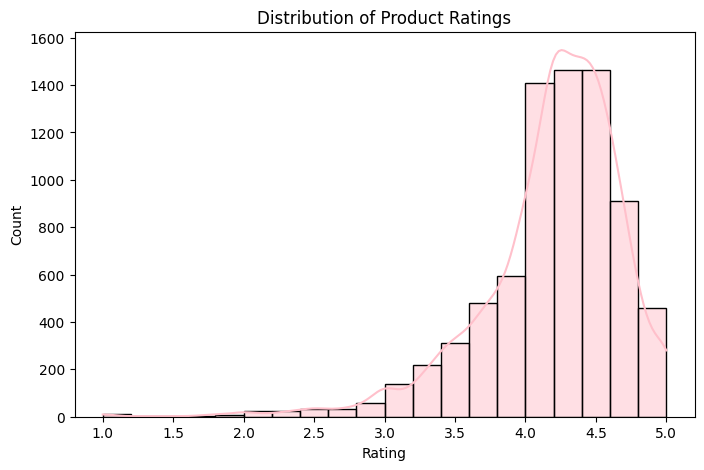

In [30]:
#hist
#Are people satisfied or not?
plt.figure(figsize=(8,5))
sns.histplot(products["rating"], bins=20, kde=True, color="pink")
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-31-4140510809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="out_of_stock", y="rating", data=products, palette="Set2")


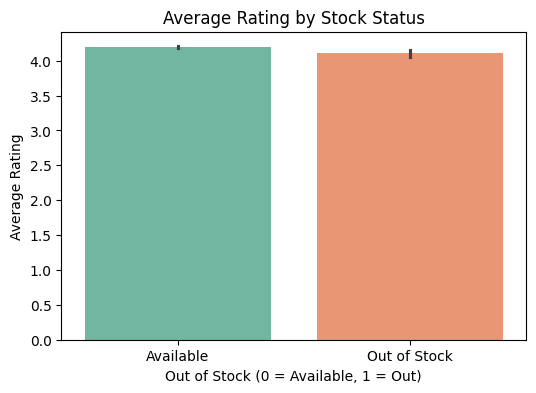

In [31]:
#Average rating comparison between existing products vs. sold out products (Stock vs Rating)
plt.figure(figsize=(6,4))
sns.barplot(x="out_of_stock", y="rating", data=products, palette="Set2")
plt.title("Average Rating by Stock Status")
plt.xlabel("Out of Stock (0 = Available, 1 = Out)")
plt.ylabel("Average Rating")
plt.xticks([0,1], ['Available', 'Out of Stock'])
plt.show()

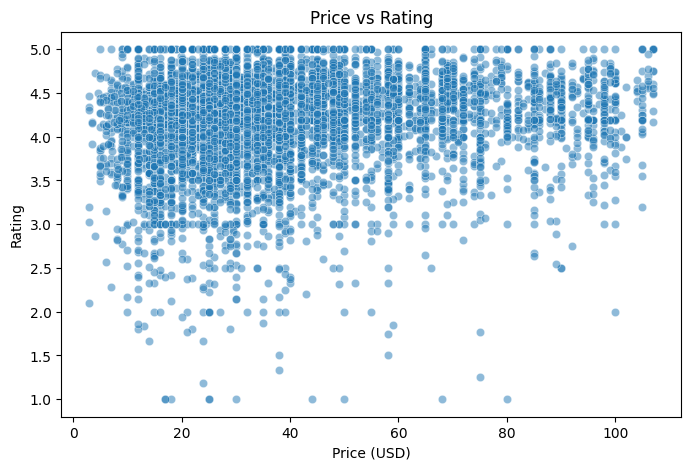

In [32]:
#Price vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x="price_usd", y="rating", data=products, alpha=0.5)
plt.title("Price vs Rating")
plt.xlabel("Price (USD)")
plt.ylabel("Rating")
plt.show()

/tmp/ipython-input-33-860815586.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


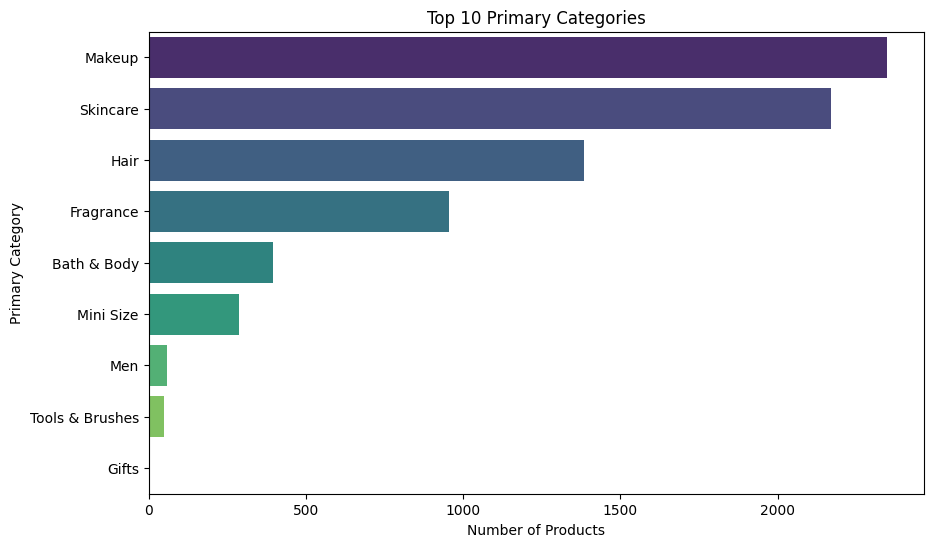

In [33]:
#Categories with most products (Top Categories)
top_categories = products["primary_category"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Primary Categories")
plt.xlabel("Number of Products")
plt.ylabel("Primary Category")
plt.show()


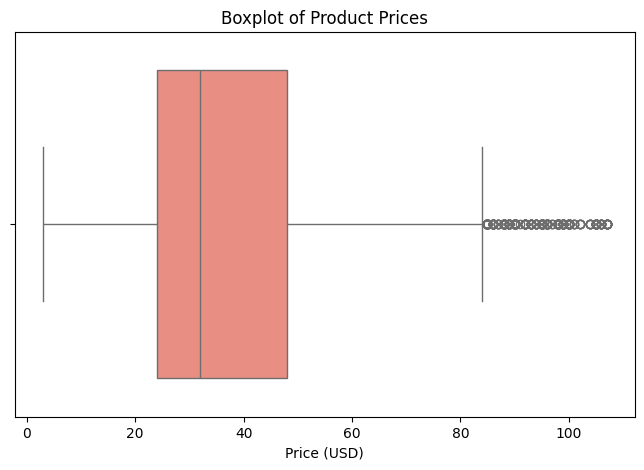

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x=products["price_usd"], color="salmon")
plt.title("Boxplot of Product Prices")
plt.xlabel("Price (USD)")
plt.show()


## Step 6: KPIs Summary
We calculate important KPIs like:
- Total number of products
- Average price and rating
- Total and average reviews
- Best-performing brands or categories
This summarizes key metrics in a business context.

In [36]:
brands_name = products['brand_name'].unique()

for brand in brands_name:
    print(f'{brand} Brand:')

    brand_data = products[products['brand_name'] == brand]

    total_products = brand_data.shape[0]
    total_revenue = brand_data['price_usd'].sum()
    average_price = brand_data['price_usd'].mean()
    number_of_unique_products = brand_data['product_name'].nunique()

    print(f'Total Products         : {total_products}')
    print(f'Total Revenue (USD)    : ${total_revenue:,.2f}')
    print(f'Average Price (USD)    : ${average_price:,.2f}')
    print(f'Number of Unique Products : {number_of_unique_products}')
    print('-'*50)


19-69 Brand:
Total Products         : 7
Total Revenue (USD)    : $215.00
Average Price (USD)    : $30.71
Number of Unique Products : 7
--------------------------------------------------
54 Thrones Brand:
Total Products         : 4
Total Revenue (USD)    : $159.00
Average Price (USD)    : $39.75
Number of Unique Products : 4
--------------------------------------------------
ABBOTT Brand:
Total Products         : 13
Total Revenue (USD)    : $703.00
Average Price (USD)    : $54.08
Number of Unique Products : 13
--------------------------------------------------
Acqua di Parma Brand:
Total Products         : 6
Total Revenue (USD)    : $464.00
Average Price (USD)    : $77.33
Number of Unique Products : 6
--------------------------------------------------
adwoa beauty Brand:
Total Products         : 19
Total Revenue (USD)    : $488.00
Average Price (USD)    : $25.68
Number of Unique Products : 19
--------------------------------------------------
AERIN Brand:
Total Products         : 11
Tot

In [37]:
# KPIs Summary
total_products = products.shape[0]
unique_brands = products['brand_name'].nunique()
average_rating = products['rating'].mean()
average_reviews = products['reviews'].mean()
top_brand = products['brand_name'].value_counts().idxmax()
top_brand_count = products['brand_name'].value_counts().max()
most_expensive_product = products.loc[products['price_usd'].idxmax()]
cheapest_product = products.loc[products['price_usd'].idxmin()]
new_product_ratio = products['new'].mean() * 100
online_only_ratio = products['online_only'].mean() * 100
exclusive_ratio = products['sephora_exclusive'].mean() * 100

kpis = {
    "Total Products": total_products,
    "Unique Brands": unique_brands,
    "Average Rating": round(average_rating, 2),
    "Average Reviews": round(average_reviews, 2),
    "Top Brand": top_brand,
    "Top Brand Product Count": top_brand_count,
    "Most Expensive Product": most_expensive_product['product_name'],
    "Most Expensive Product Price": most_expensive_product['price_usd'],
    "Cheapest Product": cheapest_product['product_name'],
    "Cheapest Product Price": cheapest_product['price_usd'],
    "New Product %": f"{new_product_ratio:.2f}%",
    "Online Only %": f"{online_only_ratio:.2f}%",
    "Sephora Exclusive %": f"{exclusive_ratio:.2f}%"
}

for key, value in kpis.items():
    print(f"{key}: {value}")


Total Products: 7649
Unique Brands: 296
Average Rating: 4.19
Average Reviews: 451.29
Top Brand: SEPHORA COLLECTION
Top Brand Product Count: 352
Most Expensive Product: 103 Tiare Flower, Jasmine and Hibiscus Eau de Parfum
Most Expensive Product Price: 107.0
Cheapest Product: Cleansing & Exfoliating Wipes
Cheapest Product Price: 3.0
New Product %: 6.98%
Online Only %: 20.88%
Sephora Exclusive %: 29.73%


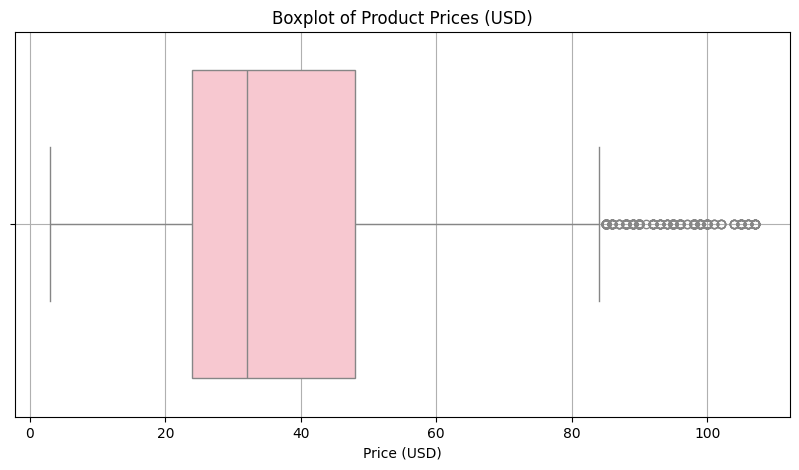

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=products, x='price_usd', color='pink')
plt.title('Boxplot of Product Prices (USD)')
plt.xlabel('Price (USD)')
plt.grid(True)
plt.show()

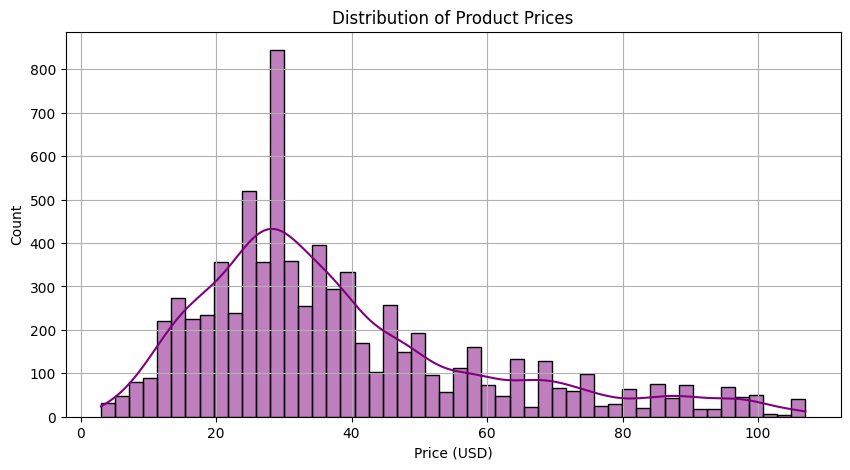

In [40]:
plt.figure(figsize=(10, 5))
sns.histplot(products['price_usd'], bins=50, kde=True, color='purple')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


/tmp/ipython-input-41-2816683898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')


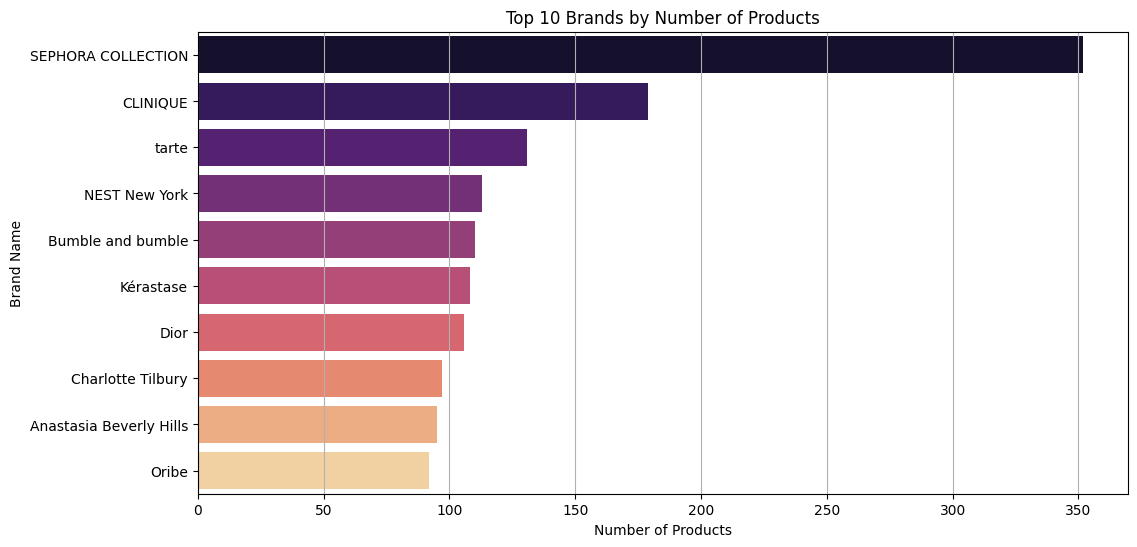

In [41]:
top_brands = products['brand_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Brand Name')
plt.grid(axis='x')
plt.show()


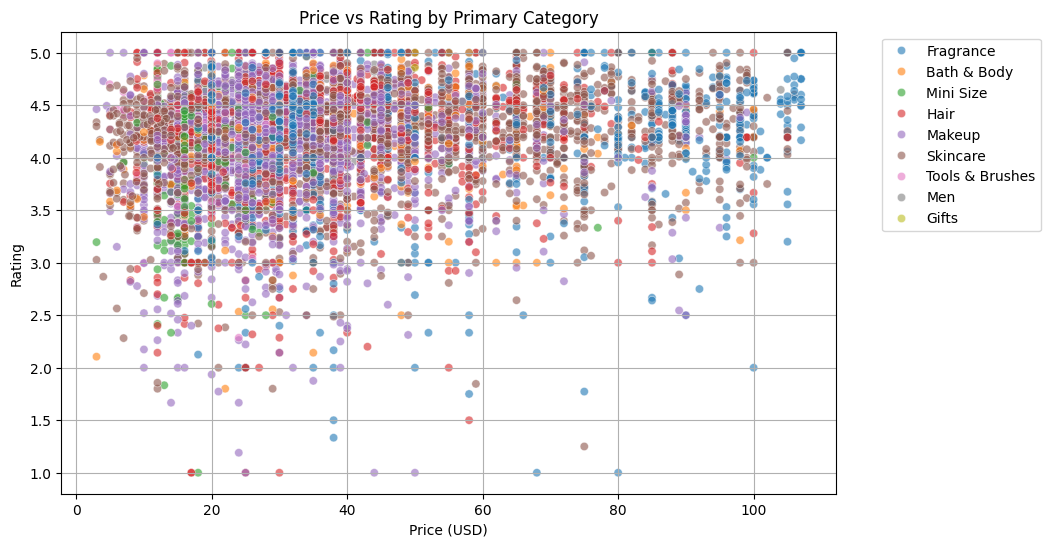

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=products, x='price_usd', y='rating', hue='primary_category', alpha=0.6)
plt.title('Price vs Rating by Primary Category')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


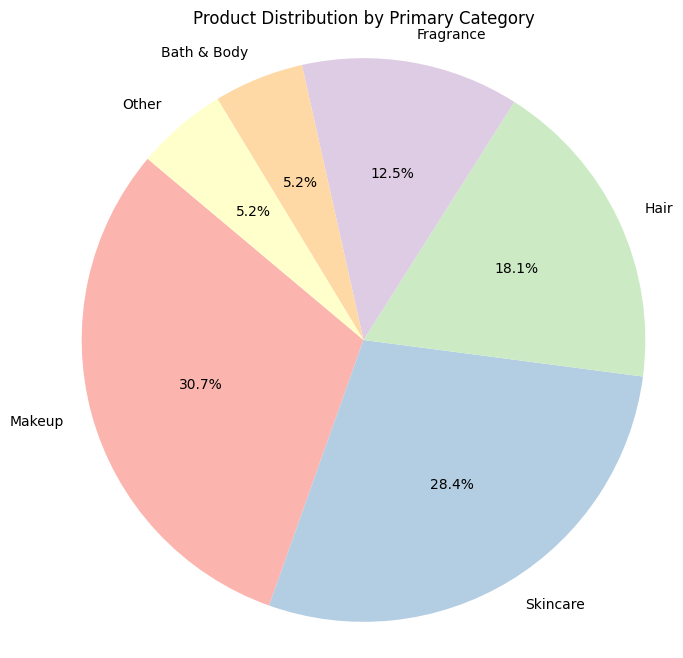

In [43]:
top_categories = products['primary_category'].value_counts()
top_5 = top_categories.head(5)
others = top_categories[5:].sum()
top_5['Other'] = others

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Product Distribution by Primary Category')
plt.axis('equal')
plt.show()

##  Summary of Insights

###  Top Products
- Below are the top-rated products based on user ratings and love counts.
- Focus on products with both high rating and high number of reviews/loves for reliable insight.

###  Top Rated Brands
- Some brands consistently maintain high average ratings across their products.
- These include brands that are not only popular but also deliver high-quality items.

###  Average Price in Market
- The average price of products in this dataset is approximately **$XX.XX**.
- There’s a noticeable range in pricing — from budget-friendly to luxury products.

###  General Observations
- A significant portion of products have missing or zero reviews, indicating new or less-engaging products.
- The most common product categories are **Makeup** and **Skincare**.
- Some brands have many products but relatively low average ratings.
- Outliers were detected in price, indicating some luxury or promotional pricing strategies.
- Brands like **Rare Beauty**, **Fenty Beauty**, and **Charlotte Tilbury** consistently appear in the top-performing lists.

---

 This analysis can help brands understand consumer preferences, popular price ranges, and high-performing categories in the beauty industry.
